In [4]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import time
df = pd.read_csv("D:/Python/achieves/2008.csv")
df2 = df[df["Origin"].isin(["ATL", "HOU", "IND"])]
df = df.head(500000)

In [5]:
#se crea una lista vacio y luego se recorre los indices
#de los dataframes
times = []
for i in np.arange(len(df)):
    times.append(
        datetime.datetime(year=2008, 
                          month = df.loc[i, "Month"],
                          day = df.loc[i, "DayofMonth"]))
    

In [7]:
#los dos ceros representas las horas y los minutos
times[1]

datetime.datetime(2008, 1, 3, 0, 0)

In [8]:
times[50000]

datetime.datetime(2008, 1, 18, 0, 0)

In [9]:
#se agrega a la tabla la columna nueva Time con el
#valor del dia del vuelo
df["Time"]= times

In [13]:
#al usar groupby con la opcion as_index = false no 
# se guarda como un indice si no como una columna en
# y despues en las otras dos columnas se guarda el 
#promedio de los retrasos por dia
data = df.groupby(by = ["Time"], as_index = False)["DepDelay","ArrDelay"].mean()
data.head(31)

C:\Users\leona\AppData\Local\Temp\ipykernel_17752\4124123253.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = df.groupby(by = ["Time"], as_index = False)["DepDelay","ArrDelay"].mean()


,Time,DepDelay,ArrDelay
0,2008-01-01,20.545599,20.999240
1,2008-01-02,23.324222,22.131194
2,2008-01-03,16.697759,14.479569
3,2008-01-04,14.058087,11.851733
4,2008-01-05,18.381555,17.138031
5,2008-01-06,18.100518,16.176674
6,2008-01-07,12.897454,11.397793
7,2008-01-08,11.328345,10.469450
8,2008-01-09,4.647451,1.190418
9,2008-01-10,8.089982,6.776395


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time', ylabel='DepDelay'>

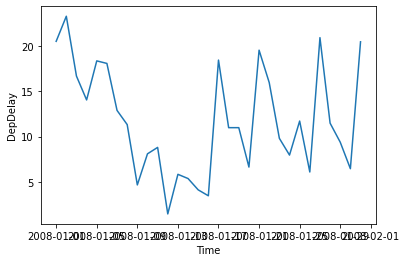

In [16]:
#la funcion recibio como parametro lo que debe tomar en cuanta al crear la tabla en los ejes Y y X
sns.lineplot(data["Time"], data["DepDelay"])

In [17]:
data = df.groupby( by = ["Time"])["DepDelay","ArrDelay"].mean()
data.head()

C:\Users\leona\AppData\Local\Temp\ipykernel_17752\338106525.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = df.groupby( by = ["Time"])["DepDelay","ArrDelay"].mean()


,DepDelay,ArrDelay
Time,,
2008-01-01,20.545599,20.999240
2008-01-02,23.324222,22.131194
2008-01-03,16.697759,14.479569
2008-01-04,14.058087,11.851733
2008-01-05,18.381555,17.138031


<AxesSubplot:xlabel='Time'>

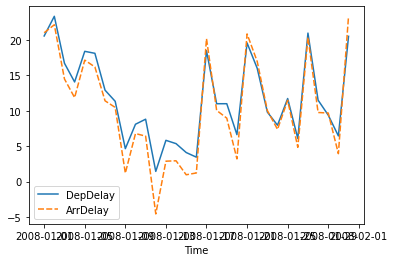

In [18]:
#al recibir un objeto de tipo data ya toma en cuenta los valores que
#debe tomar en cada uno de ellos
sns.lineplot(data =data)

In [20]:
times = []
for i in df2.index:
    times.append(
        datetime.datetime(year=2008, 
                          month = df2.loc[i, "Month"],
                          day = df2.loc[i, "DayofMonth"]))

df2["Time"] = times

<AxesSubplot:xlabel='Time', ylabel='ArrDelay'>

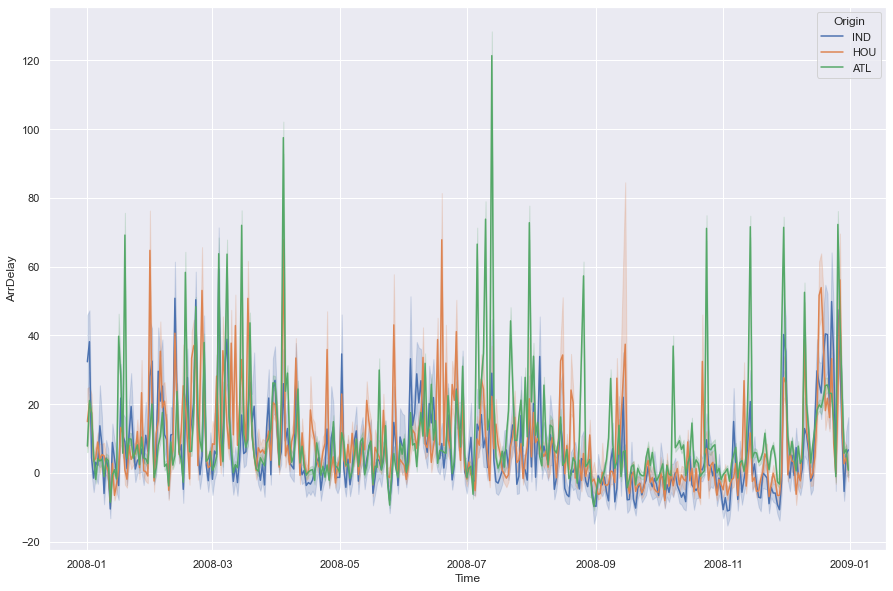

In [22]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="Time", y="ArrDelay", hue="Origin", data=df2)